# Final Project

Ok, so today we'll be working with the transactions, product, and hh_demographic tables in the project_data folder.

* First, read in the transactions data.

* Read in the only columns `household_key`, `basket_id`, `STORE_ID`, `DAY`, `QUANTITY`, and `SALES_VALUE`.

* Convert `DAY`, `QUANTITY`, and `STORE_ID` to the smallest appropriate integer types.


In [146]:
import pandas as pd
import numpy as np

In [147]:
transactions = pd.read_csv("../project_data/project_transactions.csv", 
                           usecols = ["household_key", "BASKET_ID", "STORE_ID", "DAY","QUANTITY", "SALES_VALUE"])
transactions

,household_key,BASKET_ID,DAY,QUANTITY,SALES_VALUE,STORE_ID
0,1364,26984896261,1,1,2.19,31742
1,1364,26984896261,1,1,2.99,31742
2,1364,26984896261,1,1,3.09,31742
3,1364,26984896261,1,1,2.50,31742
4,1364,26984896261,1,1,0.60,31742
...,...,...,...,...,...,...
2146306,1598,42305362535,711,1,0.99,3228
2146307,1598,42305362535,711,1,8.89,3228
2146308,1598,42305362535,711,1,6.99,3228
2146309,1598,42305362535,711,1,4.50,3228


In [148]:
# Used the following snippet to create a Date Column and drop DAY Column.

transactions = (
    transactions
    .assign(date = (pd.to_datetime("2016", format='%Y') 
            + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + " days"))
           ))


In [149]:
transactions = transactions.astype({"DAY": "int16", "QUANTITY": "int32", "STORE_ID": "int16"})

In [150]:
transactions.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   household_key  int64         
 1   BASKET_ID      int64         
 2   DAY            int16         
 3   QUANTITY       int32         
 4   SALES_VALUE    float64       
 5   STORE_ID       int16         
 6   date           datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int16(2), int32(1), int64(2)
memory usage: 81.9 MB


## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

In [151]:
transactions

,household_key,BASKET_ID,DAY,QUANTITY,SALES_VALUE,STORE_ID,date
0,1364,26984896261,1,1,2.19,31742,2016-01-01
1,1364,26984896261,1,1,2.99,31742,2016-01-01
2,1364,26984896261,1,1,3.09,31742,2016-01-01
3,1364,26984896261,1,1,2.50,31742,2016-01-01
4,1364,26984896261,1,1,0.60,31742,2016-01-01
...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,1,0.99,3228,2017-12-11
2146307,1598,42305362535,711,1,8.89,3228,2017-12-11
2146308,1598,42305362535,711,1,6.99,3228,2017-12-11
2146309,1598,42305362535,711,1,4.50,3228,2017-12-11


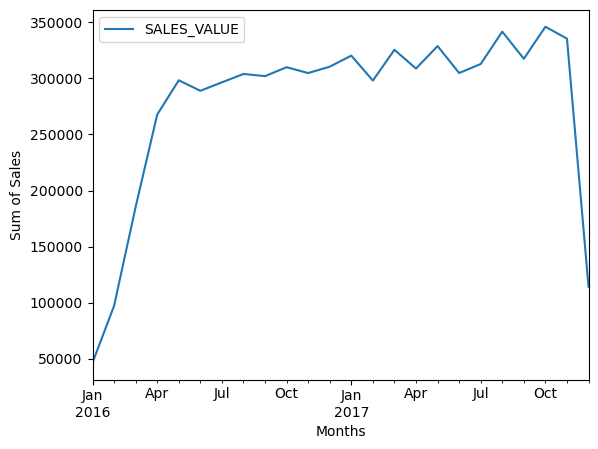

In [152]:
Salesbymonth = transactions.set_index("date").loc[:, ["SALES_VALUE"]].resample("M").sum()

Salesbymonth.plot(xlabel = "Months",
                  ylabel = "Sum of Sales");

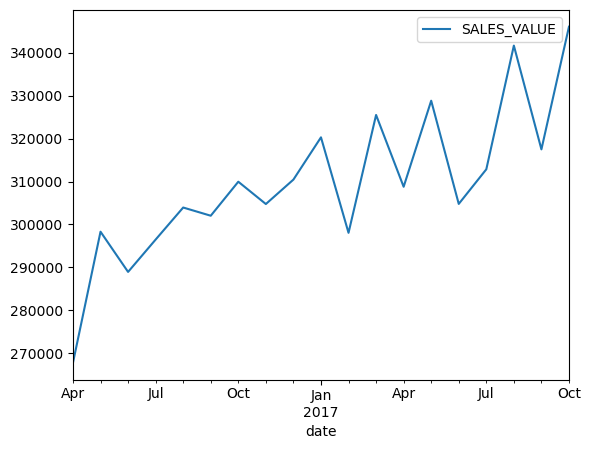

In [153]:
Salesbymonth.loc["2016-04":"2017-10", :].plot();

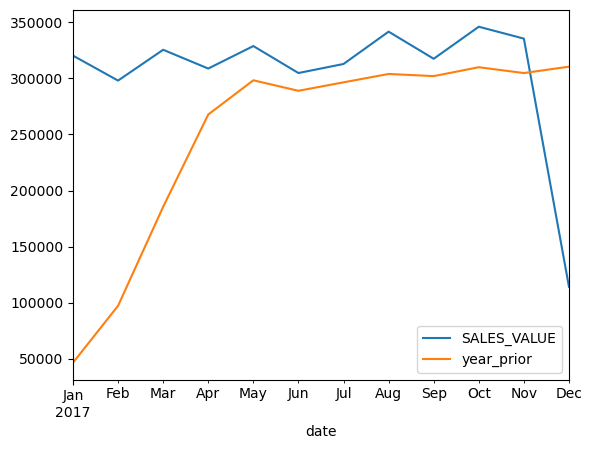

In [154]:
Salesbymonth.assign(year_prior = lambda x: x["SALES_VALUE"].shift(12)).loc["2017", :].plot();

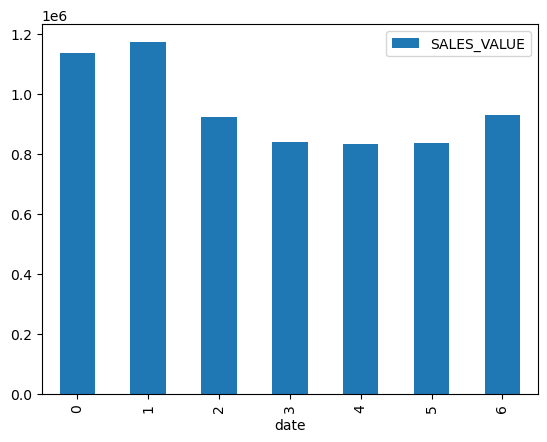

In [155]:
transactions.groupby(transactions["date"].dt.dayofweek)[["SALES_VALUE"]].agg("sum").plot.bar();

# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc (in separate charts).


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [156]:
demo = pd.read_csv("../project_data/hh_demographic.csv", usecols = ["AGE_DESC", "INCOME_DESC", "household_key", "HH_COMP_DESC"])
demo = demo.astype({"household_key": "int16"})
demo

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16
...,...,...,...,...
796,35-44,50-74K,2 Adults No Kids,2494
797,45-54,75-99K,Unknown,2496
798,45-54,35-49K,Single Male,2497
799,25-34,50-74K,2 Adults No Kids,2498


In [157]:
transac_agg = transactions.groupby("household_key")[["SALES_VALUE"]].agg("sum")
transac_agg

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


In [158]:
merged = demo.merge(transac_agg,
          how = "left",
          left_on = "household_key",
          right_on = "household_key")
merged

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key,SALES_VALUE
0,65+,35-49K,2 Adults No Kids,1,4330.16
1,45-54,50-74K,2 Adults No Kids,7,3400.05
2,25-34,25-34K,2 Adults Kids,8,5534.97
3,25-34,75-99K,2 Adults Kids,13,13190.92
4,45-54,50-74K,Single Female,16,1512.02
...,...,...,...,...,...
796,35-44,50-74K,2 Adults No Kids,2494,NaN
797,45-54,75-99K,Unknown,2496,NaN
798,45-54,35-49K,Single Male,2497,NaN
799,25-34,50-74K,2 Adults No Kids,2498,NaN


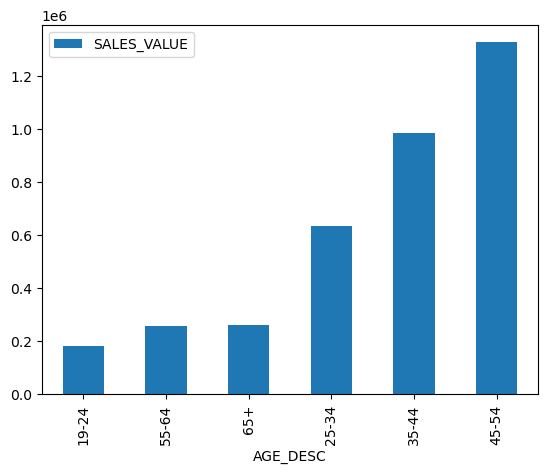

In [159]:
merged.groupby("AGE_DESC")[["SALES_VALUE"]].agg("sum").sort_values("SALES_VALUE", ascending = True).plot.bar();

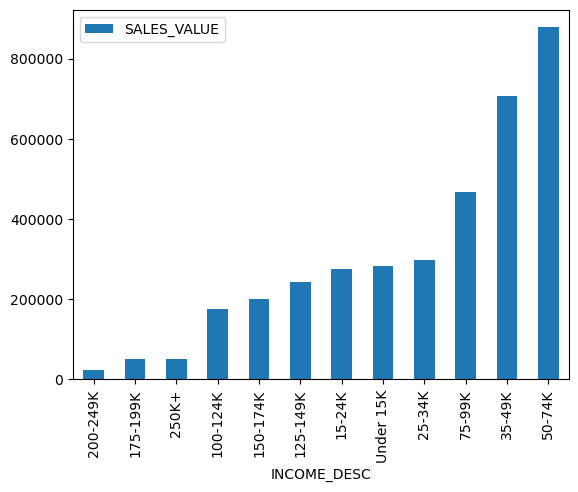

In [160]:
merged.groupby("INCOME_DESC")[["SALES_VALUE"]].agg("sum").sort_values("SALES_VALUE", ascending = True).plot.bar();

In [161]:
merged.pivot_table(index = "AGE_DESC",
                  columns = "HH_COMP_DESC",
                  aggfunc = "mean",
                  values = "SALES_VALUE",
                  margins = True).style.background_gradient(cmap = "RdYlGn", axis = None)



HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000,4692.077692
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000,5435.517521
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818,6090.556728
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682,5534.879958
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000,5168.924200
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000,4340.936500
All,6032.802143,6280.069103,5599.857756,4895.928361,4544.646750,4936.127778,5468.398743


In [162]:
# AGE_DESC: "55-64" and HH_COMP_DESC: "Unknown" has the Highest Average

# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



In [163]:
product = pd.read_csv("../project_data/product.csv", usecols = ["PRODUCT_ID", "DEPARTMENT"], dtype = 
                      {"PRODUCT_ID": "int32", 
                      "DEPARTMENT" : "category"})
transactions = pd.read_csv("../project_data/project_transactions.csv")

In [164]:
final_merged = transactions.merge(demo,
                                 how = "inner",
                                 left_on = "household_key",
                                 right_on = "household_key").merge(product,
                                                                  how = "inner",
                                                                  left_on = "PRODUCT_ID",
                                                                  right_on = "PRODUCT_ID")

In [165]:
final_merged

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,AGE_DESC,INCOME_DESC,HH_COMP_DESC,DEPARTMENT
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,65+,100-124K,Single Female,GROCERY
1,304,27950201718,81,842930,1,1.67,333,-0.52,12,0.0,0.0,25-34,50-74K,2 Adults No Kids,GROCERY
2,575,34186568032,485,842930,1,1.67,433,-0.62,70,0.0,0.0,35-44,50-74K,Single Female,GROCERY
3,77,28023861855,87,842930,3,5.00,346,-1.57,13,0.0,0.0,35-44,100-124K,2 Adults Kids,GROCERY
4,454,42136182098,699,842930,1,1.67,391,-0.62,101,0.0,0.0,55-64,35-49K,Single Male,GROCERY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161570,540,41413346731,645,913709,1,10.99,299,0.00,93,0.0,0.0,25-34,50-74K,Single Female,DRUG GM
1161571,540,41587471481,658,1024615,1,11.99,299,0.00,95,0.0,0.0,25-34,50-74K,Single Female,DRUG GM
1161572,540,41587471481,658,9831733,1,0.00,299,-10.49,95,0.0,0.0,25-34,50-74K,Single Female,DRUG GM
1161573,540,41834711355,677,830676,1,8.99,299,-2.00,97,0.0,0.0,25-34,50-74K,Single Female,NUTRITION


In [166]:
final_table_pivoted = final_merged.pivot_table(index = "AGE_DESC",
                        columns = "DEPARTMENT",
                        values = "SALES_VALUE",
                        aggfunc = "sum",
                        margins = True).style.background_gradient(cmap = "RdYlGn", axis = 0)
final_table_pivoted

DEPARTMENT,,AUTOMOTIVE,CHARITABLE CONT,CHEF SHOPPE,CNTRL/STORE SUP,COSMETICS,COUP/STR & MFG,DAIRY DELI,DELI,DELI/SNACK BAR,DRUG GM,ELECT &PLUMBING,FLORAL,FROZEN GROCERY,GARDEN CENTER,GM MERCH EXP,GRO BAKERY,GROCERY,HBC,HOUSEWARES,KIOSK-GAS,MEAT,MEAT-PCKGD,MEAT-WHSE,MISC SALES TRAN,MISC. TRANS.,NUTRITION,PASTRY,PHARMACY SUPPLY,PHOTO,PORK,POSTAL CENTER,PROD-WHS SALES,PRODUCE,RESTAURANT,RX,SALAD BAR,SEAFOOD,SEAFOOD-PCKGD,SPIRITS,TOYS,TRAVEL & LEISUR,VIDEO,VIDEO RENTAL,All
AGE_DESC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19-24,0.000000,11.640000,0.000000,81.300000,2.000000,698.630000,7.490000,3.800000,4043.300000,0.000000,25297.430000,0.000000,776.990000,1.640000,41.980000,0.000000,0.000000,99008.270000,0.000000,0.000000,8465.180000,11957.340000,10453.130000,0.000000,2031.730000,73.520000,1146.400000,2386.730000,0.000000,4.980000,0.000000,0.000000,0.000000,10170.590000,1.390000,0.000000,1330.150000,461.180000,1500.270000,2983.750000,0.000000,50.220000,0.000000,0.000000,182991.030000
25-34,0.000000,21.250000,0.000000,134.160000,0.000000,2273.030000,48.420000,3.850000,18181.940000,0.000000,85298.050000,0.000000,2355.570000,53.050000,380.110000,0.000000,0.000000,327926.160000,0.000000,0.000000,50817.910000,37162.660000,30029.690000,0.000000,8200.660000,757.370000,11067.450000,8161.420000,5.970000,5.190000,0.000000,0.000000,0.000000,41706.460000,389.040000,0.000000,2050.060000,2080.940000,4189.130000,2474.460000,0.000000,173.560000,7.990000,0.000000,635955.550000
35-44,0.000000,72.580000,0.000000,348.530000,1.000000,4362.020000,121.200000,7.390000,34577.290000,6.980000,126480.340000,0.000000,5246.600000,108.960000,701.830000,17.760000,0.000000,490616.030000,0.000000,0.000000,92614.660000,61003.950000,46499.110000,1.000000,9976.190000,1334.700000,15941.860000,13706.810000,3.980000,6.980000,0.000000,0.000000,2.520000,67779.890000,234.110000,26.880000,3631.810000,3101.910000,6346.770000,1491.370000,0.000000,283.190000,13.990000,0.000000,986670.190000
45-54,0.000000,55.920000,0.000000,418.240000,9.950000,5187.570000,154.550000,16.750000,44334.220000,1.560000,177007.130000,0.000000,6835.690000,84.500000,1487.900000,30.370000,2.180000,667162.980000,0.000000,0.000000,96858.440000,87407.670000,59855.460000,4.000000,23617.850000,859.080000,16366.510000,19534.790000,1.990000,2.490000,0.000000,5.960000,5.000000,96442.730000,540.310000,26.780000,4770.150000,5551.320000,10079.840000,3218.340000,1.490000,431.480000,0.000000,0.000000,1328371.190000
55-64,0.000000,0.000000,0.000000,80.860000,2.000000,986.260000,40.680000,3.140000,9850.540000,0.000000,29220.930000,0.000000,1112.690000,54.220000,248.070000,12.050000,0.000000,127082.010000,0.000000,0.000000,16329.770000,20001.910000,11891.430000,1.000000,7762.980000,688.730000,2504.010000,3601.860000,0.000000,0.000000,0.000000,1.000000,0.000000,21326.150000,33.900000,0.000000,925.770000,1363.950000,2975.970000,263.180000,0.000000,81.150000,0.000000,0.000000,258446.210000
65+,0.000000,16.370000,0.000000,149.240000,0.100000,600.900000,20.490000,1.940000,10462.330000,3.310000,32759.760000,0.000000,1160.220000,20.190000,441.810000,2.950000,0.000000,129117.270000,0.000000,0.000000,17853.990000,17514.190000,10413.650000,0.000000,2657.760000,142.630000,3114.280000,5162.800000,0.000000,1.990000,0.000000,0.330000,0.000000,23295.780000,30.650000,10.990000,1677.880000,1341.450000,2206.100000,141.640000,0.000000,133.200000,0.000000,0.000000,260456.190000
All,0.000000,177.760000,nan,1212.330000,15.050000,14108.410000,392.830000,36.870000,121449.620000,11.850000,476063.640000,nan,17487.760000,322.560000,3301.700000,63.130000,2.180000,1840912.720000,nan,nan,282939.950000,235047.720000,169142.470000,6.000000,54247.170000,3856.030000,50140.510000,52554.410000,11.940000,21.630000,nan,7.290000,7.520000,260721.600000,1229.400000,64.650000,14385.820000,13900.750000,27298.080000,10572.740000,1.490000,1152.800000,21.980000,nan,3652890.360000


In [167]:
# Yougest demographic "19-24" was highest in "SPIRITS"

# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.

In [168]:
final_table_pivoted.to_excel("demographic_category_sales.xlsx", sheet_name="sales_pivot")